# A hands-on tutorial for data science learners: COVID-19 dataset -- Part 4: (A) How to group a Pandas DataFrame in Python by its columns? (B) How to analyze the condition of a dataframe with respect to its missing values?

The main goal of this article, which is a part of a more comprehensive set of tutorials, is to provide a hands-on tutorial for data science learners. Although you may find some useful statistical information about the COVID-19, please note that studying the COVID-19 is not the primary objective here. Hence, you may discern that a large portion of this set of tutorials is devoted to teaching how to use Python and useful packages like _pandas_, _matplotlib_, _seaborn_, etc., in order to accomplish several important tasks in the context of data science. For example, these tutorials will hopefully help you with exploratory data analysis (EDA), data cleansing, statistical analysis, and data visualization of a generic dataset. Yet, some interesting findings will be revealed thanks to the comprehensive dataset provided by _Our World in Data_.


## What you learnt from the past:
1. pandas:
- Reading a csv file from your computer or a host on the web, and storing it using a pandas dataframe.
- To examine the dataset using the pandas methods such as `head`, `tail`, `info`, and `describe`.
- Selecting columns of dataframe based on their type using the method `select_dtypes`.
- Selecting numeric and non-numeric variables of a dataframe.
- Checking for the duplicate rows in a dataframe using the method `duplicated`.
- Checking for the missing values in a dataframe using the method `isnull`.
- Methods of `any` and `sum`.
- Extracing a subset of dataset based on a given condition.
- Transposing index and columns of a dataframe using the method `transpose`.
- The datetime data types.
- How to convert the data type of a variable of dataframe from object to datetime using the function of `to_datetime`.

2. matplotlib:
- Using the _matplotlib_ library to visualize a time series data.
- Creating different types of plots using the functions `bar` and `plot`.
- Using `subplots` for creating an array of figures.
- Adjust the spacing between subplots using `subplots_adjust`.
- Plotting multiple graphs on the same axes.
- Setting labels and titles of plots.
- Adjusting the size of figures.
- Adding legend to plots.

## What you will hopefully learn here:
1. pandas:
- Grouping a dataframe based on its columns using the `groupby` method, and compute operations on the resulted groups.
- Analyzing the dataset, focusing on missing values.


2. matplotlib:
- Visualizing the number of missing values of each column of dataframe using bar-plot.
- Visualizing an ordered dictionary using bar-plot.
- Saving the figure on the disk using the `savefig` method.

3. python:
- Using ordered dictionary

## COVID-19 Dataset from "Our World in Data"

The COVID-19 dataset that is analyzed in this study, is a collection of the COVID-19 data maintained by "Our World in Data". It is updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest [[source]](https://github.com/owid/covid-19-data/tree/master/public/data). 
A full codebook containing a description and source for each variable in the dataset is accessible from [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

# Loading the libraries

Let's first load the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Loading and pre-process the dataset

Now, let's read tha dataset from the csv file we have stored locally, as seen in the previous tutorials.

In [2]:
fname = 'owid-covid-data.csv'
df = pd.read_csv(fname)

### ***Reading the dataset into a pandas dataframe directly from the URL***

Alternatively, you can read the most-updated dataset into a pandas dataframe directly from its remote repository, as shown below:

In [3]:
import io
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
req = requests.get(csv_url)
s=requests.get(csv_url).content
df_from_url=pd.read_csv(io.StringIO(s.decode('utf-8')))

### Converting the data type of date from object to datetime

As seen in previous tutorials, in order to convert the variable `date` from an object to a datetime, we can use the pandas' function `to_datetime`:

In [4]:
#for our local dataset
df.date = pd.to_datetime(df.date)

#for the most up-to-date dataset directly fetched from the remote repository
df_from_url.date = pd.to_datetime(df_from_url.date)

For this tutorial, let's use the most up-to-date dataset at the time of writing:

In [5]:
df = df_from_url.copy()

# DataFrame | Groupby

The `groupby` method is useful to group DataFrame using a mapper or by a Series of columns [(Ref)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). This can be used to group large amounts of data and compute operations on these groups.

For example, let's say we want to group our dataframe based on the `location` (_grouping_), and in the meantime, we want to find the average (_compute operation_) of the numeric variables for each group across the dataframe.

In [6]:
df_location = df.groupby('location').mean()
df_location

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.520149e+04,246.948031,248.658935,2.912346e+03,12.126853,11.593863,1636.771417,6.199216,6.242157,73.109409,...,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
Africa,3.313571e+06,13277.637771,13385.279455,8.778784e+04,342.699690,345.336381,2412.525422,9.667102,9.745486,63.916043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,7.456187e+04,314.851852,314.873839,1.337787e+03,4.893376,4.879211,25953.213519,109.592449,109.600107,465.651730,...,7.100,51.200,NaN,2.890,78.57,0.795,4111.082353,15.733529,32.426471,1430.969995
Algeria,9.276636e+04,329.171924,331.091062,2.724736e+03,9.733010,9.533955,2079.188219,7.377776,7.420806,61.069989,...,0.700,30.400,83.741,1.900,76.88,0.748,NaN,NaN,NaN,NaN
Andorra,7.891234e+03,25.614650,25.581778,8.964145e+01,0.213816,0.208714,102014.557446,331.135430,330.710096,1158.846990,...,29.000,37.800,NaN,NaN,83.73,0.868,64.900000,32.142000,31.525000,838.999922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
World,9.490044e+07,383333.794910,384154.857576,2.123650e+06,7670.047904,7703.233069,12050.901458,48.677507,48.781799,269.670948,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
Yemen,4.013774e+03,16.899830,17.014178,8.917258e+02,3.400703,3.301404,131.639559,0.554304,0.557991,29.245889,...,7.600,29.200,49.542,0.700,66.12,0.470,NaN,NaN,NaN,NaN


You can see that the non-numeric columns are dropped automatically. Now, the `df_location` dataframe has all the numeric columns of the original dataframe, `df`, except that `df_location` has the averaged values for each `location`.

It is worth mentioning that the dataframe `df_location` has values averaged over the whole time series for each `location`. For example, the value of `total_cases` for `World`, shows the average of `total_cases` over the whole records of the location `World`. Later, we will discuss how to take average over some shorter time intervals, e.g. weekly, monthly, etc.

As a sidenote, one could group the dataset based on `iso_code`, but I found `location` to be more self-explanatory when reviewing the records. In case of grouping by `iso_code`, you would get:

In [7]:
df_iso_code = df.groupby('iso_code').mean()
df_iso_code

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,NaN,NaN
AFG,6.520149e+04,246.948031,248.658935,2912.345964,12.126853,11.593863,1636.771417,6.199216,6.242157,73.109409,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
AGO,2.182223e+04,106.552459,107.344527,553.168053,2.876872,2.856451,643.085897,3.140013,3.163365,16.301481,...,NaN,NaN,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN
AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.88,NaN,NaN,NaN,NaN,NaN
ALB,7.456187e+04,314.851852,314.873839,1337.786753,4.893376,4.879211,25953.213519,109.592449,109.600107,465.651730,...,7.1,51.2,NaN,2.89,78.57,0.795,4111.082353,15.733529,32.426471,1430.969995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,2.732970e+00,0.008174,0.006320,NaN,NaN,0.000000,13.654894,0.040839,0.031558,NaN,...,16.7,38.1,NaN,NaN,73.32,0.715,NaN,NaN,NaN,NaN
YEM,4.013774e+03,16.899830,17.014178,891.725835,3.400703,3.301404,131.639559,0.554304,0.557991,29.245889,...,7.6,29.2,49.542,0.70,66.12,0.470,NaN,NaN,NaN,NaN
ZAF,1.257010e+06,4685.260800,4720.249763,39094.238806,148.527363,144.487798,20935.505269,78.033054,78.615818,651.114886,...,8.1,33.2,43.993,2.32,64.13,0.709,83845.676087,11.740652,24.162935,1396.450513


# Analyzing the dataset, focusing on missing values

You may have noticed that there are some `NaN` entries in `df_location`. Let's take a look at the raw data (dataframe `df`) for one of the examples, say _"Wallis and Futuna"_.

In [8]:
df[df.location=='Wallis and Futuna']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131742,WLF,Oceania,Wallis and Futuna,2021-03-23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
131743,WLF,Oceania,Wallis and Futuna,2021-03-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
131744,WLF,Oceania,Wallis and Futuna,2021-03-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
131745,WLF,Oceania,Wallis and Futuna,2021-03-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
131746,WLF,Oceania,Wallis and Futuna,2021-03-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131975,WLF,Oceania,Wallis and Futuna,2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
131976,WLF,Oceania,Wallis and Futuna,2021-11-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
131977,WLF,Oceania,Wallis and Futuna,2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
131978,WLF,Oceania,Wallis and Futuna,2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN


To get a better understanding of the stats of the missing values, we can examine every column and see how many entries are missing for each column:

In [9]:
this_loc = 'Wallis and Futuna'
number_of_missing_val = {}
for this_col in df.select_dtypes('float').columns:
    number_of_missing_val[this_col] = df[df.location==this_loc][this_col].isna().sum()

print(f'number of missing values for each column for the location of {this_loc}:')
number_of_missing_val

number of missing values for each column for the location of Wallis and Futuna:


{'total_cases': 238,
 'new_cases': 238,
 'new_cases_smoothed': 238,
 'total_deaths': 238,
 'new_deaths': 238,
 'new_deaths_smoothed': 238,
 'total_cases_per_million': 238,
 'new_cases_per_million': 238,
 'new_cases_smoothed_per_million': 238,
 'total_deaths_per_million': 238,
 'new_deaths_per_million': 238,
 'new_deaths_smoothed_per_million': 238,
 'reproduction_rate': 238,
 'icu_patients': 238,
 'icu_patients_per_million': 238,
 'hosp_patients': 238,
 'hosp_patients_per_million': 238,
 'weekly_icu_admissions': 238,
 'weekly_icu_admissions_per_million': 238,
 'weekly_hosp_admissions': 238,
 'weekly_hosp_admissions_per_million': 238,
 'new_tests': 238,
 'total_tests': 238,
 'total_tests_per_thousand': 238,
 'new_tests_per_thousand': 238,
 'new_tests_smoothed': 238,
 'new_tests_smoothed_per_thousand': 238,
 'positive_rate': 238,
 'tests_per_case': 238,
 'total_vaccinations': 205,
 'people_vaccinated': 205,
 'people_fully_vaccinated': 210,
 'total_boosters': 238,
 'new_vaccinations': 238,

Visualization is an effective way to get deep insight into the condition of your dataset with respect to the missing values. We can plot the number of missing values for each column as shown in the following. Here, we are also saving the produced figure as a _png_ file on the disk using the `savefig` method.

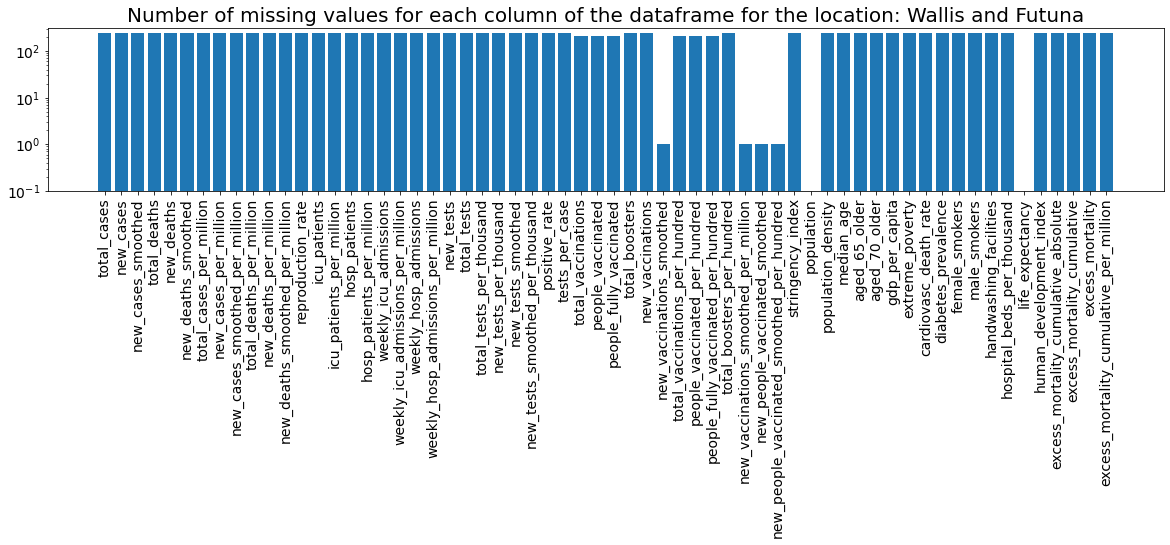

In [10]:
fig, ax = plt.subplots(figsize=(20, 3), facecolor=(1, 1, 1))
ax.bar(number_of_missing_val.keys(), number_of_missing_val.values())
plt.setp(ax.get_xticklabels(), rotation=90);
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_yscale('log')
plt.ylim(0.1, )
ax.set_title(f'Number of missing values for each column of the dataframe for the location: {this_loc}', fontsize=20);
plt.savefig('missing_val_01.png', bbox_inches='tight')

We can see that the dataframe `df` has so many missing values. The two columns without missing values are `life_expectancy` and `population`.

# Ordered dictionary in Python

We stored the number of missing values in a regular dictionary, which is not sorted by itself. It is sometimes convenient to use the ordered dictionary from the `collections` module. The collection module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, `dict`, `list`, `set`, and `tuple` [(More details from Ref)](https://docs.python.org/3/library/collections.html). In particular, `OrderedDict` returns an instance of a `dict` subclass that has methods specialized for rearranging dictionary order [(More details from Ref)](https://docs.python.org/3/library/collections.html#collections.OrderedDict).

In the following, we sort our dictionary _number_of_missing_val_ based on its keys and values:

In [11]:
from collections import OrderedDict
number_of_missing_val_sort_key = OrderedDict(sorted(number_of_missing_val.items(), key=lambda t: t[0]))
number_of_missing_val_sort_val = OrderedDict(sorted(number_of_missing_val.items(), key=lambda t: t[1]))

In [12]:
print('ordered dictionary | ordered by keys:')
number_of_missing_val_sort_key

ordered dictionary | ordered by keys:


OrderedDict([('aged_65_older', 238),
             ('aged_70_older', 238),
             ('cardiovasc_death_rate', 238),
             ('diabetes_prevalence', 238),
             ('excess_mortality', 238),
             ('excess_mortality_cumulative', 238),
             ('excess_mortality_cumulative_absolute', 238),
             ('excess_mortality_cumulative_per_million', 238),
             ('extreme_poverty', 238),
             ('female_smokers', 238),
             ('gdp_per_capita', 238),
             ('handwashing_facilities', 238),
             ('hosp_patients', 238),
             ('hosp_patients_per_million', 238),
             ('hospital_beds_per_thousand', 238),
             ('human_development_index', 238),
             ('icu_patients', 238),
             ('icu_patients_per_million', 238),
             ('life_expectancy', 0),
             ('male_smokers', 238),
             ('median_age', 238),
             ('new_cases', 238),
             ('new_cases_per_million', 238),
           

In [13]:
print('ordered dictionary | ordered by values:')
number_of_missing_val_sort_val

ordered dictionary | ordered by values:


OrderedDict([('population', 0),
             ('life_expectancy', 0),
             ('new_vaccinations_smoothed', 1),
             ('new_vaccinations_smoothed_per_million', 1),
             ('new_people_vaccinated_smoothed', 1),
             ('new_people_vaccinated_smoothed_per_hundred', 1),
             ('total_vaccinations', 205),
             ('people_vaccinated', 205),
             ('total_vaccinations_per_hundred', 205),
             ('people_vaccinated_per_hundred', 205),
             ('people_fully_vaccinated', 210),
             ('people_fully_vaccinated_per_hundred', 210),
             ('total_cases', 238),
             ('new_cases', 238),
             ('new_cases_smoothed', 238),
             ('total_deaths', 238),
             ('new_deaths', 238),
             ('new_deaths_smoothed', 238),
             ('total_cases_per_million', 238),
             ('new_cases_per_million', 238),
             ('new_cases_smoothed_per_million', 238),
             ('total_deaths_per_million', 23

Now, if we produce the same bar-plot for the ordered dictionary, we can much more quickly figure out which columns have more/less missing values. The following code snippet can get the job done. Again, we save the generated figure, here, as a _png_ file with a different name.

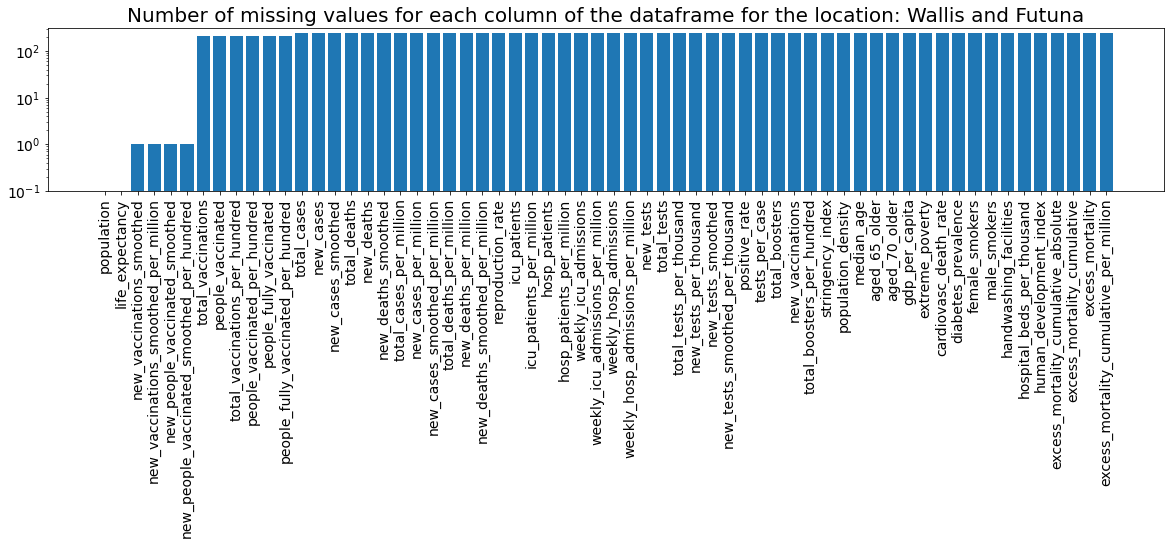

In [14]:
fig, ax = plt.subplots(figsize=(20, 3), facecolor=(1, 1, 1))
ax.bar(number_of_missing_val_sort_val.keys(), number_of_missing_val_sort_val.values())
plt.setp(ax.get_xticklabels(), rotation=90);
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_yscale('log')
plt.ylim(0.1, )
ax.set_title(f'Number of missing values for each column of the dataframe for the location: {this_loc}', fontsize=20);
plt.savefig('missing_val_02_sorted.png', bbox_inches='tight')

## Index of dataframe after grouping

Getting back to grouping operation, we can see that after grouping the original dataframe, `df`, by `location`, the variable `location` is now used as the index of the resulted dataframe `df_location`:

In [15]:
df_location.index

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=237)

As you saw from the previous tutorials, one can access a subset of dataframe based on the number of row. For example, to get the first 5 records:

In [16]:
df_location.iloc[:5]

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.520149e+04,246.948031,248.658935,2912.345964,12.126853,11.593863,1636.771417,6.199216,6.242157,73.109409,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
Africa,3.313571e+06,13277.637771,13385.279455,87787.840836,342.699690,345.336381,2412.525422,9.667102,9.745486,63.916043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,7.456187e+04,314.851852,314.873839,1337.786753,4.893376,4.879211,25953.213519,109.592449,109.600107,465.651730,...,7.1,51.2,NaN,2.89,78.57,0.795,4111.082353,15.733529,32.426471,1430.969995
Algeria,9.276636e+04,329.171924,331.091062,2724.736246,9.733010,9.533955,2079.188219,7.377776,7.420806,61.069989,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
Andorra,7.891234e+03,25.614650,25.581778,89.641447,0.213816,0.208714,102014.557446,331.135430,330.710096,1158.846990,...,29.0,37.8,NaN,NaN,83.73,0.868,64.900000,32.142000,31.525000,838.999922


You could also access a subset of dataframe, based on 1. number of row and 2. column. For example, to access `total_cases`, `total_deaths`, `population`, and `life_expectancy` of the last five records:

In [17]:
df_location[['total_cases', 'total_deaths', 'population', 'life_expectancy']].iloc[-5:]

,total_cases,total_deaths,population,life_expectancy
location,,,,
Wallis and Futuna,NaN,NaN,1.109400e+04,79.94
World,9.490044e+07,2.123650e+06,7.874966e+09,72.58
Yemen,4.013774e+03,8.917258e+02,3.049064e+07,66.12
Zambia,7.499723e+04,1.253695e+03,1.892066e+07,63.89
Zimbabwe,4.007815e+04,1.426336e+03,1.509217e+07,61.49


Finally, you could access a subset of dataframe, based on 1. column and 2. index. For example, to access `total_cases`, `total_deaths`, `population`, and `life_expectancy` of `United States`, `Africa`, `Asia`, `Europe`, `Oceania`, `South America`, `North America`, and `World`:

In [18]:
df_location[['total_cases', 'total_deaths', 'population', 'life_expectancy']].loc[[
    'United States', 'Africa', 'Asia', 'Europe', 'Oceania', 'South America', 'North America', 'World'
]]

,total_cases,total_deaths,population,life_expectancy
location,,,,
United States,1.927485e+07,3.774593e+05,3.329151e+08,78.86
Africa,3.313571e+06,8.778784e+04,1.373486e+09,NaN
Asia,2.740704e+07,4.132277e+05,4.678445e+09,NaN
Europe,2.558810e+07,6.172069e+05,7.489630e+08,NaN
Oceania,5.266659e+04,9.577663e+02,4.321995e+07,NaN
South America,1.684035e+07,5.431178e+05,4.342601e+08,NaN
North America,2.269562e+07,5.570784e+05,5.965813e+08,NaN
World,9.490044e+07,2.123650e+06,7.874966e+09,72.58


We will see later that selectively extract data from a dataset allows us to visualize data in a very informative way. It is also worth mentioning again that `df_location` has values averaged over the whole time series for each `location`. Later, we will discuss how to take average over some shorter time intervals, e.g. weekly, monthly, etc.

# Final remarks

Hopefully, this short tutorial was able to help you use Python in future to get more insight into your own dataset. The process of development of this set of tutorials is ongoing at the time of writing. To learn more, you can check out to see if the next parts are available online. You can also check out the forums, in case you want to check out the discussions that might be relevant to this topic. 